In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from random import random, randrange, choice, shuffle
from datetime import datetime, timedelta, date
from itertools import combinations
from pprint import pprint
import calendar
import plotly.express as px
import time

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all" # Cell의 모든 반환값 출력

pd.set_option('display.max_rows', None)

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [2]:
def init_jungban(사이즈):  #사이즈 = (10, 10)
    surface_width, surface_height = 사이즈[0], 사이즈[1]  # Adjusted to match the provided image for demonstration
    surface = np.zeros((surface_height, surface_width), dtype=int)
    return surface, surface_width, surface_height

def can_place_with_thresh(surface, surface_width, surface_height, block_height, block_width, start_row, start_col, thresh):
    new_width = surface_width - thresh
    new_height = surface_height - thresh
    
    if start_row + block_height > surface_height or start_col + block_width > surface_width:
        return False

    block_area = surface[start_row:start_row+block_height, start_col:start_col+block_width]
    if np.any(block_area != 0):
        return False
    
    if start_row > 0 and np.any(surface[start_row-thresh: start_row, start_col:start_col+block_width] != 0):
        return False
    if start_col > 0 and np.any(surface[start_row: start_row+block_height, start_col-thresh: start_col] != 0):
        return False
    
    return True

# Function to place a block on the surface, if possible
def place_block(surface, block_height, block_width, start_row, start_col, block_id):
    block_height, block_width = block_height, block_width
    surface[start_row:start_row + block_height, start_col:start_col + block_width] = block_id
    return surface

In [3]:
def 레이아웃배치(surface, surface_width, surface_height, block_width, block_height, block_id, thresh):
    
    best_fit_score = float('inf')
    best_position = None
    
    for start_row in range(surface_height - block_height + 1):
        for start_col in range(surface_width - block_width + 1):
            if can_place_with_thresh(surface, surface_width, surface_height, block_height, block_width, start_row, start_col, thresh):
                # Calculate a score; here we use the top-left corner (y, x) as the score
                # A lower score means the block is closer to the top-left
                score = start_row + start_col
                if score < best_fit_score:
                    best_fit_score = score
                    best_position = (start_row, start_col)
    
    if best_position:
        surface = place_block(surface, block_height, block_width, *best_position, block_id)
        return True, surface
    else:
        return False, surface

In [4]:
def remove_block(arr, del_id):
    new_arr = arr.copy()
    new_arr[new_arr == del_id] = 0
    return new_arr

In [5]:
# 정반 Init
사이즈 = (16, 8)
surface0, surface_width, surface_height = init_jungban(사이즈)
surface0.shape, surface_width, surface_height

((8, 16), 16, 8)

In [6]:
bool_res, surface1 = 레이아웃배치(surface0, surface_width, surface_height, 3, 6, 1, 1)
bool_res, surface1

(True,
 array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [7]:
bool_res, surface2 = 레이아웃배치(surface1, surface_width, surface_height, 4, 7, 2, 1)
bool_res, surface2

(True,
 array([[1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [8]:
bool_res, surface3 = 레이아웃배치(surface2, surface_width, surface_height, 3, 5, 3, 1)
bool_res, surface3

(True,
 array([[1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
        [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
        [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
        [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
        [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
        [1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [9]:
surface4 = remove_block(surface3, 2)
surface4

array([[1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
surface3

array([[1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [11]:
def get_overlapped_surface(*arrays):
    result = arrays[0]
    for arr in arrays[1:]:
        result = np.add(result, arr)
    return result

In [12]:
overlapped_surface = get_overlapped_surface(*[surface3, surface4])
overlapped_surface

array([[2, 2, 2, 0, 2, 2, 2, 2, 0, 6, 6, 6, 0, 0, 0, 0],
       [2, 2, 2, 0, 2, 2, 2, 2, 0, 6, 6, 6, 0, 0, 0, 0],
       [2, 2, 2, 0, 2, 2, 2, 2, 0, 6, 6, 6, 0, 0, 0, 0],
       [2, 2, 2, 0, 2, 2, 2, 2, 0, 6, 6, 6, 0, 0, 0, 0],
       [2, 2, 2, 0, 2, 2, 2, 2, 0, 6, 6, 6, 0, 0, 0, 0],
       [2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [13]:
bool_res, surface6 = 레이아웃배치(overlapped_surface, surface_width, surface_height, 4, 3, 4, 1)
bool_res, surface6

(True,
 array([[2, 2, 2, 0, 2, 2, 2, 2, 0, 6, 6, 6, 0, 0, 0, 0],
        [2, 2, 2, 0, 2, 2, 2, 2, 0, 6, 6, 6, 0, 0, 0, 0],
        [2, 2, 2, 0, 2, 2, 2, 2, 0, 6, 6, 6, 0, 0, 0, 0],
        [2, 2, 2, 0, 2, 2, 2, 2, 0, 6, 6, 6, 0, 0, 0, 0],
        [2, 2, 2, 0, 2, 2, 2, 2, 0, 6, 6, 6, 0, 0, 0, 0],
        [2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 4, 4],
        [0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 4, 4, 4, 4],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4]]))

In [14]:
# 특정 값만 남기고 다 지운후에 그 결과를 다시 각 해당일 surface에 더해준다...천재네..ㅋ
def extract_newblock_layout_only(overlapped_surface, block_id):
    mask = overlapped_surface != block_id
    overlapped_surface[mask] = 0
    newblock_layout = overlapped_surface
    return newblock_layout

In [15]:
newblock_layout = extract_newblock_layout_only(surface6, 4)
newblock_layout

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4]])

In [26]:
def draw_layout(surface, block_names):
    fig, ax = plt.subplots(figsize=(8, 8))

    cmap = mcolors.ListedColormap(['white'] + ['C{}'.format(i) for i in range(len(block_names))])
    norm = mcolors.BoundaryNorm(np.arange(0.5, len(block_names) + 2), cmap.N)

    ax.imshow(surface, cmap=cmap, norm=norm)

    for y in range(surface.shape[0]):
        for x in range(surface.shape[1]):
            if surface[y, x] != 0:
                ax.text(x, y, str(block_names[surface[y, x]-1]), ha='center', va='center', color='black', fontsize=6)
                
    ax.set_xticks(np.arange(-.5, surface.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, surface.shape[0], 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)

    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

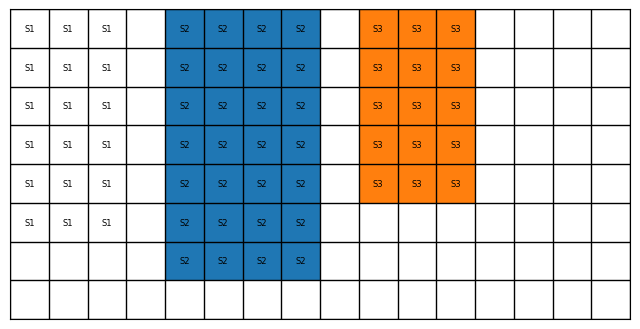

In [27]:
block_names = ["S1", "S2", "S3", "S4", "S5"]
draw_layout(surface3, block_names)


In [28]:
surface3

array([[1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 2, 2, 2, 0, 3, 3, 3, 0, 0, 0, 0],
       [1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])